<a href="https://colab.research.google.com/github/geek-aaquib/SentimentAnalysisOnAmazonReviews/blob/master/SentimentAnalysisOnAmazonReviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plan of Action
* Setting up the environment
* Data Preprocessing and Handling
* Preparing Embedding Layer
* Training the Model
* Making Prdeiction and deducing accuracy of Model
* Business Problems and it's solutions

# Setting the environment

In [ ]:
# Importing essential libraries and functions

import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from numpy import array
import tensorflow as tf
import seaborn as sns


from keras.preprocessing.text import one_hot, Tokenizer
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, GlobalMaxPooling1D, Embedding, Conv1D, LSTM
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from collections import Counter

In [ ]:
pip install Keras-Preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.3 MB/s eta 0:00:00


In [ ]:
from keras_preprocessing.sequence import pad_sequences

Loading Dataset

In [ ]:

test_data = pd.read_csv("/content/drive/MyDrive/Amazon Reviews/test.csv", header = None)
train_data = pd.read_csv("/content/drive/MyDrive/Amazon Reviews/train.csv", header = None)

In [ ]:
print(train_data)
print(test_data)

         0                                                  1  \
0        2                     Stuning even for the non-gamer   
1        2              The best soundtrack ever to anything.   
2        2                                           Amazing!   
3        2                               Excellent Soundtrack   
4        2  Remember, Pull Your Jaw Off The Floor After He...   
...     ..                                                ...   
3599995  1                                      Don't do it!!   
3599996  1                      Looks nice, low functionality   
3599997  1                         compact, but hard to clean   
3599998  1                                 what is it saying?   
3599999  2              Makes My Blood Run Red-White-And-Blue   

                                                         2  
0        This sound track was beautiful! It paints the ...  
1        I'm reading a lot of reviews saying that this ...  
2        This soundtrack is my favor

In [ ]:
train_data.columns=["Rating","title","Text"]
test_data.columns=["Rating","title","Text"]

In [ ]:
train_data.shape

(3600000, 3)

In [ ]:
train_data.describe

<bound method NDFrame.describe of          Rating                                              title  \
0             2                     Stuning even for the non-gamer   
1             2              The best soundtrack ever to anything.   
2             2                                           Amazing!   
3             2                               Excellent Soundtrack   
4             2  Remember, Pull Your Jaw Off The Floor After He...   
...         ...                                                ...   
3599995       1                                      Don't do it!!   
3599996       1                      Looks nice, low functionality   
3599997       1                         compact, but hard to clean   
3599998       1                                 what is it saying?   
3599999       2              Makes My Blood Run Red-White-And-Blue   

                                                      Text  
0        This sound track was beautiful! It paints the ...  
1  

In [ ]:
train_data.head(100)

,Rating,title,Text
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,Amazing!,This soundtrack is my favorite music of all ti...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
...,...,...,...
95,1,Very Not Worth Your Time,The book was wriiten very horribly. I would ne...
96,2,Very fun and educational,"Trains, shapes and pegs - a winning combinatio..."
97,1,Ludicrous and silly,I remember getting this book so faintly that t...
98,2,Artistry,I think that the Deodato concerts are very ric...


In [ ]:
test_data.head(100)

,Rating,title,Text
0,2,Great CD,My lovely Pat has one of the GREAT voices of h...
1,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
2,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
3,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
4,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...
...,...,...,...
95,2,The Scarlet Letter a must read for any American,The best book that I have ever been assigned t...
96,1,The Scarlet Letter: A soap opera,"Although this book, is considered a great work..."
97,2,This book is Great!,One might notice that many of the negative rev...
98,1,I had to read it...,I had to read this book for school. I did not ...


In [ ]:
train_data = train_data.head(100000)
test_data = test_data.head(10000)

In [ ]:
def concat_columns(df, col1, col2, new_col):
    df[new_col] = df[col1].apply(str) + ' ' + df[col2].apply(str)
    df.drop(col2, axis = 1, inplace = True)
    return df

train_data = concat_columns(train_data, 'Text', 'title', 'Text')
test_data = concat_columns(test_data, 'Text', 'title', 'Text')

In [ ]:
train_data
test_data

,Rating,Text
0,2,My lovely Pat has one of the GREAT voices of h...
1,2,Despite the fact that I have only played a sma...
2,1,I bought this charger in Jul 2003 and it worke...
3,2,Check out Maha Energy's website. Their Powerex...
4,2,Reviewed quite a bit of the combo players and ...
...,...,...
9995,2,"This was a wonderful read on poetry, and I esp..."
9996,1,"The device works well enough, but I am disappo..."
9997,2,"My daughter loves this, she is six months old ..."
9998,1,I purchased this item for my 6 month old baby ...


In [ ]:
train_data.dropna()
test_data.dropna()

,Rating,Text
0,2,My lovely Pat has one of the GREAT voices of h...
1,2,Despite the fact that I have only played a sma...
2,1,I bought this charger in Jul 2003 and it worke...
3,2,Check out Maha Energy's website. Their Powerex...
4,2,Reviewed quite a bit of the combo players and ...
...,...,...
9995,2,"This was a wonderful read on poetry, and I esp..."
9996,1,"The device works well enough, but I am disappo..."
9997,2,"My daughter loves this, she is six months old ..."
9998,1,I purchased this item for my 6 month old baby ...


In [ ]:
train_data['Rating'].max()

2

In [ ]:
train_data['Rating'] = train_data['Rating'].apply(lambda x: 0 if x == 1 else 1)
test_data['Rating'] = test_data['Rating'].apply(lambda x: 0 if x == 1 else 1)

In [ ]:
train_data

,Rating,Text
0,1,This sound track was beautiful! It paints the ...
1,1,I'm reading a lot of reviews saying that this ...
2,1,This soundtrack is my favorite music of all ti...
3,1,I truly like this soundtrack and I enjoy video...
4,1,"If you've played the game, you know how divine..."
...,...,...
99995,1,very good excelent fantastic wonderful muy bue...
99996,0,THESE ARE THE REAL ADVENTURES OF THE REAL SUPE...
99997,0,Sylvain Beauregard is WIDELY known to die-hard...
99998,0,I think I now know more about the person who w...


# Data Preprocessing



In [ ]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
     '''Removes HTML tags: replaces anything between opening and closing <> with empty space'''

     return TAG_RE.sub('', text)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def preprocess_text(sen):
    '''Cleans text data up, leaving only 2 or more char long non-stepwords composed of A-Z & a-z only
    in lowercase'''

    # Remove Numbers
    sentence = sen.replace('\d','')

    sentence = sen.lower()

    # Remove html tags
    sentence = remove_tags(sentence)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    # Remove Stopwords
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    sentence = pattern.sub('', sentence)

    return sentence

In [ ]:
# Calling preprocessing_text function

# Apply the clean_text function to all text in the 'text' column
train_data['Text'] = train_data['Text'].apply(preprocess_text)
test_data['Text'] = test_data['Text'].apply(preprocess_text)

# Show the updated dataframe
train_data.head()
test_data.head()

,Rating,Text
0,1,lovely pat one great voices generation listene...
1,1,despite fact played small portion game music h...
2,0,bought charger jul worked ok design nice conve...
3,1,check maha energy website powerex mh f charger...
4,1,reviewed quite bit combo players hesitant due ...


In [ ]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.stem import SnowballStemmer

# initialize SnowballStemmer
stemmer = SnowballStemmer('english')

def stem_text(text):
    # Tokenize the input text into individual words
    tokens = nltk.word_tokenize(text)

    # Stem each token using the SnowballStemmer
    stemmed_tokens = [stemmer.stem(token) for token in tokens]

    # Join the stemmed tokens back into a single string
    return ' '.join(stemmed_tokens)

In [ ]:
# apply stemming to the 'text' column
train_data['Text'] = train_data['Text'].apply(stem_text)
test_data['Text']=test_data['Text'].apply(stem_text)
# Show the updated dataframe
train_data.head()

,Rating,Text
0,1,sound track beauti paint seneri mind well woul...
1,1,read lot review say best game soundtrack figur...
2,1,soundtrack favorit music time hand intens sad ...
3,1,truli like soundtrack enjoy video game music p...
4,1,play game know divin music everi singl song te...


>EDA with Seaborn and Matplotlib

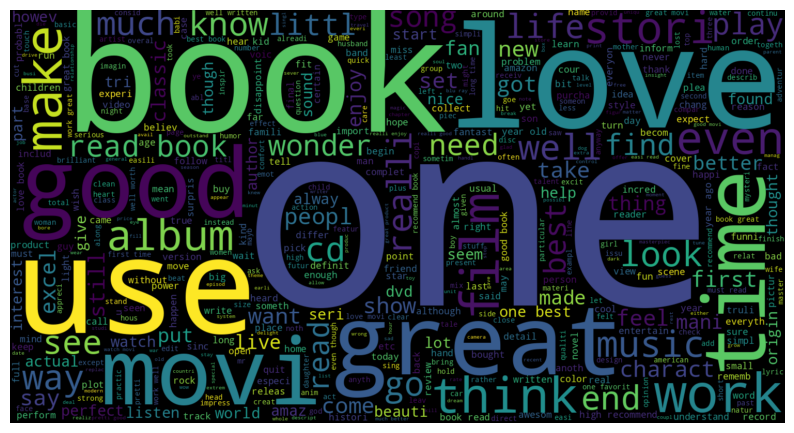

In [ ]:
def wordcloud_text(text):

    plt.figure(figsize = (10, 8))
    wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="black", colormap= 'viridis').generate(text)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

positive_text = " ".join(train_data[train_data['Rating'] == 1]['Text'])  #here 1 for positive
wordcloud_text(positive_text) #for positive sentence

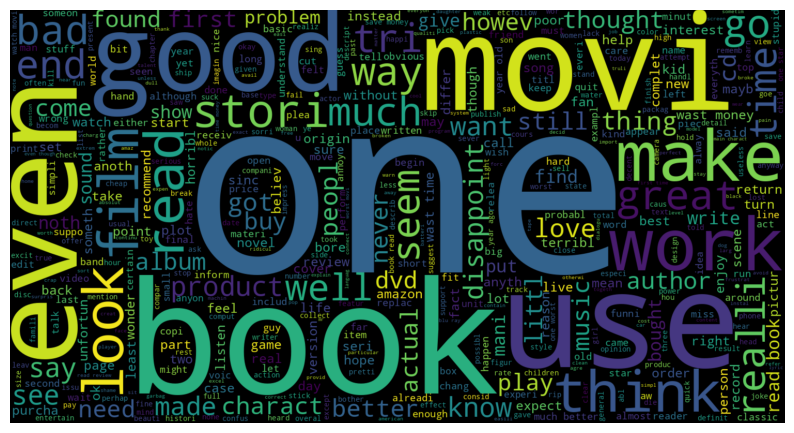

In [ ]:
def wordcloud_text(text):

    plt.figure(figsize = (10, 8))
    wordcloud = WordCloud(max_words=500, height= 800, width = 1500,  background_color="black", colormap= 'viridis').generate(text)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

negative_text = " ".join(train_data[train_data['Rating'] == 0]['Text'])# 0 for negative
wordcloud_text(negative_text)  #for negative

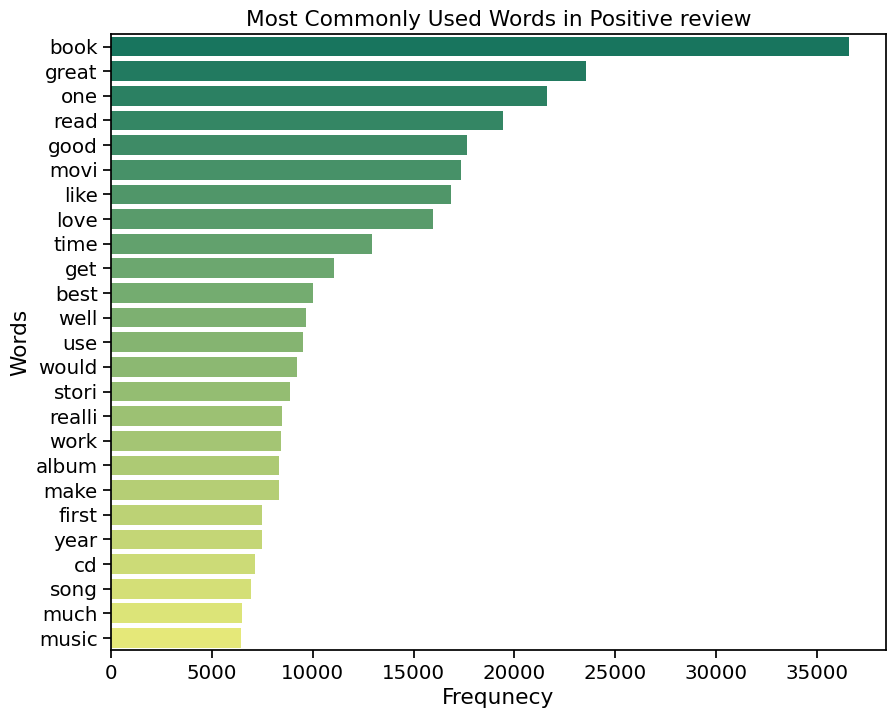

In [ ]:
def plot_words_freq(words):

    df1 = pd.DataFrame(Counter(words).most_common(25), columns= ['Word', 'Frequency'])

    sns.set_context('notebook', font_scale= 1.3)
    plt.figure(figsize=(10,8))
    sns.barplot(y = df1['Word'], x= df1['Frequency'], palette= 'summer')
    plt.title("Most Commonly Used Words in Positive review")
    plt.xlabel("Frequnecy")
    plt.ylabel("Words")
    return plt.show()


plot_words_freq((positive_text).split())

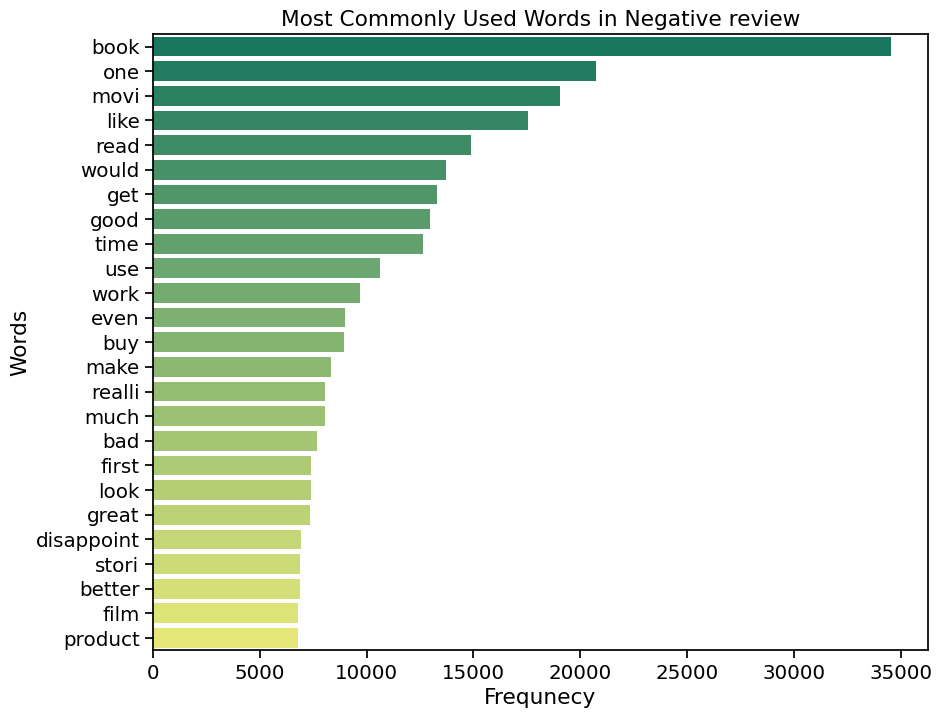

In [ ]:
def plot_words_freq(words):

    df1 = pd.DataFrame(Counter(words).most_common(25), columns= ['Word', 'Frequency'])

    sns.set_context('notebook', font_scale= 1.3)
    plt.figure(figsize=(10,8))
    sns.barplot(y = df1['Word'], x= df1['Frequency'], palette= 'summer')
    plt.title("Most Commonly Used Words in Negative review")
    plt.xlabel("Frequnecy")
    plt.ylabel("Words")
    return plt.show()


plot_words_freq((negative_text).split())

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(train_data['Text']), np.array(train_data['Rating']), test_size=0.20, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(80000,)
(20000,)


# Preparing Embedding Layer

In [ ]:
average_len = np.mean([len(item) for item in X_train])
average_len

241.2017

In [ ]:
# Maximum number of words to be considered in the vocabulary
max_words = 10000
# Maximum number of tokens in a sequence
max_len = int(average_len + 100)
# Tokenizer
tokenizer = Tokenizer(num_words = max_words, oov_token='<OOV>')
# Snap tokenizer to text data
tokenizer.fit_on_texts(X_train)
# Converts texts into strings of numbers
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)
# Mapping words to indexes
word_index = tokenizer.word_index

In [ ]:
# Sequence padding
data_train = pad_sequences(sequences_train, maxlen = max_len)
data_test = pad_sequences(sequences_test, maxlen = max_len)

In [ ]:
# Load GloVe word embeddings and create an Embeddings Dictionary

from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('/content/drive/MyDrive/Amazon Reviews/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [ ]:
# Create Embedding Matrix having 100 columns
# Containing 100-dimensional GloVe word embeddings for all words in our corpus.

embedding_matrix = zeros((len(word_index) + 1, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
embedding_matrix.shape

(66350, 100)

# Model Training & Evaluation

>Simple Neural Network

In [ ]:
# Neural Network architecture

snn_model = Sequential()
vocab_length = len(word_index) + 1
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=max_len , trainable=False)

snn_model.add(embedding_layer)

snn_model.add(Flatten())
snn_model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Model compiling

snn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(snn_model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 371, 100)          9290900   
                                                                 
 flatten_1 (Flatten)         (None, 37100)             0         
                                                                 
 dense_5 (Dense)             (None, 1)                 37101     
                                                                 
Total params: 9,328,001
Trainable params: 37,101
Non-trainable params: 9,290,900
_________________________________________________________________
None


In [ ]:
# Model training
history = snn_model.fit(data_train, y_train, epochs = 10, batch_size = 64, validation_split=0.2)

Epoch 1/10
1000/1000 [==============================] - 12s 11ms/step - loss: 0.4913 - acc: 0.7647 - val_loss: 0.4568 - val_acc: 0.7840
Epoch 2/10
1000/1000 [==============================] - 7s 7ms/step - loss: 0.4283 - acc: 0.8028 - val_loss: 0.4696 - val_acc: 0.7877
Epoch 3/10
1000/1000 [==============================] - 7s 7ms/step - loss: 0.4126 - acc: 0.8127 - val_loss: 0.4705 - val_acc: 0.7867
Epoch 4/10
1000/1000 [==============================] - 8s 8ms/step - loss: 0.4045 - acc: 0.8176 - val_loss: 0.4838 - val_acc: 0.7818
Epoch 5/10
1000/1000 [==============================] - 7s 7ms/step - loss: 0.3994 - acc: 0.8189 - val_loss: 0.4867 - val_acc: 0.7832
Epoch 6/10
1000/1000 [==============================] - 9s 9ms/step - loss: 0.3942 - acc: 0.8235 - val_loss: 0.4959 - val_acc: 0.7824
Epoch 7/10
1000/1000 [==============================] - 7s 7ms/step - loss: 0.3905 - acc: 0.8247 - val_loss: 0.5015 - val_acc: 0.7827
Epoch 8/10
1000/1000 [==============================] - 8s 8

In [ ]:
# Predictions on the Test Set

score = snn_model.evaluate(data_test, y_test, verbose=1)

625/625 [==============================] - 2s 3ms/step - loss: 0.5177 - acc: 0.7789


In [ ]:
# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.5176703929901123
Test Accuracy: 0.7788500189781189


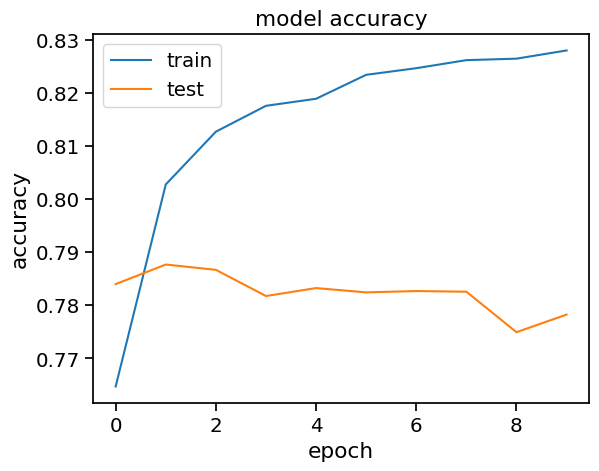

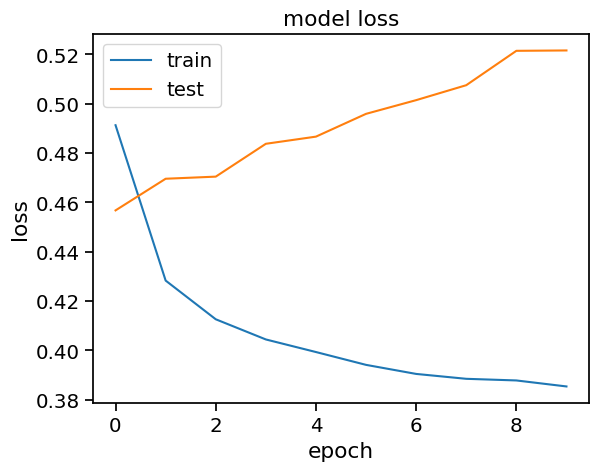

In [ ]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

>CNN

In [ ]:
from keras.layers import Conv1D


In [ ]:
# Neural Network architecture

cnn_model = Sequential()

embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=max_len , trainable=False)
cnn_model.add(embedding_layer)

cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Model compiling

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(cnn_model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 371, 100)          9290900   
                                                                 
 conv1d_1 (Conv1D)           (None, 367, 128)          64128     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                                                 
Total params: 9,355,157
Trainable params: 64,257
Non-trainable params: 9,290,900
_________________________________________________________________
None


In [ ]:
# Model training

cnn_model_history = cnn_model.fit(data_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
500/500 [==============================] - 193s 386ms/step - loss: 0.4211 - acc: 0.8036 - val_loss: 0.3593 - val_acc: 0.8407
Epoch 2/6
500/500 [==============================] - 199s 397ms/step - loss: 0.3200 - acc: 0.8632 - val_loss: 0.3411 - val_acc: 0.8509
Epoch 3/6
500/500 [==============================] - 198s 397ms/step - loss: 0.2741 - acc: 0.8878 - val_loss: 0.3342 - val_acc: 0.8547
Epoch 4/6
500/500 [==============================] - 198s 397ms/step - loss: 0.2348 - acc: 0.9079 - val_loss: 0.3338 - val_acc: 0.8559
Epoch 5/6
500/500 [==============================] - 198s 396ms/step - loss: 0.1984 - acc: 0.9275 - val_loss: 0.3474 - val_acc: 0.8514
Epoch 6/6
500/500 [==============================] - 198s 395ms/step - loss: 0.1698 - acc: 0.9399 - val_loss: 0.3480 - val_acc: 0.8527


In [ ]:
# Predictions on the Test Set

score = cnn_model.evaluate(data_test, y_test, verbose=1)

625/625 [==============================] - 25s 40ms/step - loss: 0.3411 - acc: 0.8575


In [ ]:
# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.34111374616622925
Test Accuracy: 0.8575000166893005


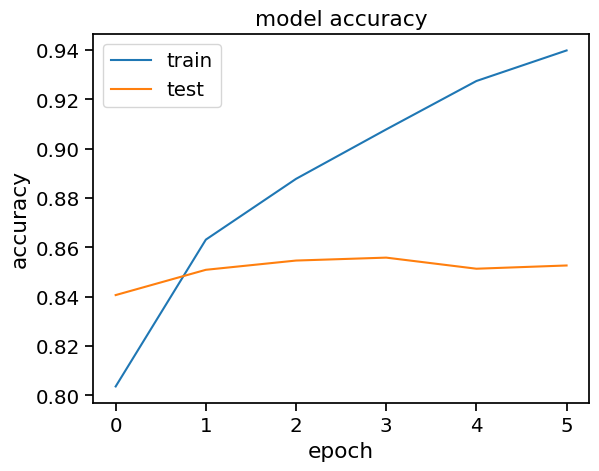

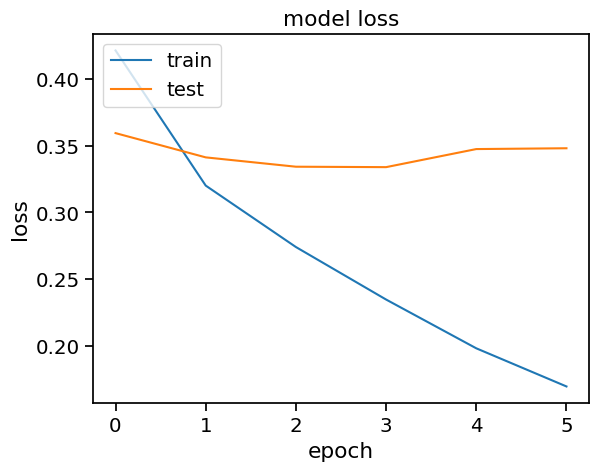

In [ ]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(cnn_model_history.history['acc'])
plt.plot(cnn_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(cnn_model_history.history['loss'])
plt.plot(cnn_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

>RNN (LSTM)

In [ ]:
from keras.layers import LSTM

lstm_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=max_len , trainable=False)

lstm_model.add(embedding_layer)
lstm_model.add(LSTM(128))

lstm_model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Model compiling

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(lstm_model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 371, 100)          9290900   
                                                                 
 lstm_3 (LSTM)               (None, 128)               117248    
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 9,408,277
Trainable params: 117,377
Non-trainable params: 9,290,900
_________________________________________________________________
None


In [ ]:
# Model Training

lstm_model_history = lstm_model.fit(data_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
500/500 [==============================] - 654s 1s/step - loss: 0.4140 - acc: 0.8087 - val_loss: 0.3660 - val_acc: 0.8391
Epoch 2/6
500/500 [==============================] - 647s 1s/step - loss: 0.3314 - acc: 0.8569 - val_loss: 0.3221 - val_acc: 0.8584
Epoch 3/6
500/500 [==============================] - 656s 1s/step - loss: 0.3049 - acc: 0.8702 - val_loss: 0.3206 - val_acc: 0.8641
Epoch 4/6
500/500 [==============================] - 665s 1s/step - loss: 0.2800 - acc: 0.8816 - val_loss: 0.3092 - val_acc: 0.8626
Epoch 5/6
500/500 [==============================] - 673s 1s/step - loss: 0.2621 - acc: 0.8902 - val_loss: 0.3145 - val_acc: 0.8687
Epoch 6/6
500/500 [==============================] - 692s 1s/step - loss: 0.2411 - acc: 0.9014 - val_loss: 0.3070 - val_acc: 0.8706


In [ ]:
# Predictions on the Test Set

score = lstm_model.evaluate(data_test, y_test, verbose=1)

625/625 [==============================] - 146s 232ms/step - loss: 0.2984 - acc: 0.8779


In [ ]:
# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.2984035909175873
Test Accuracy: 0.8779000043869019


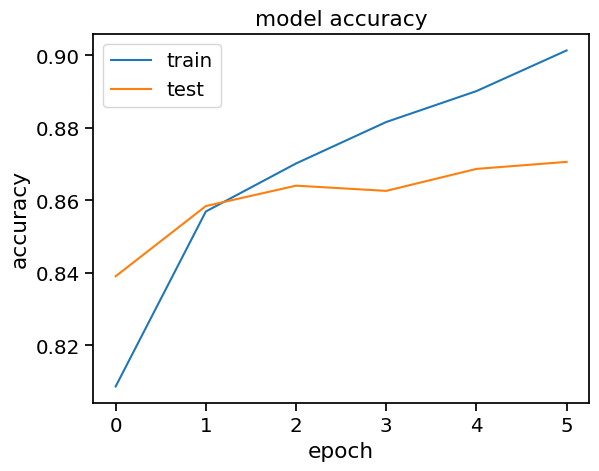

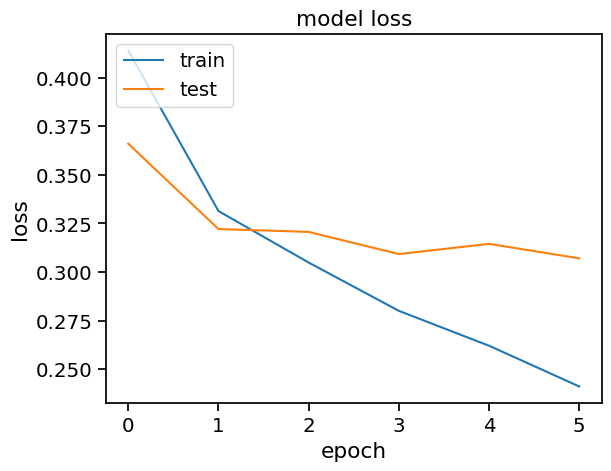

In [ ]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(lstm_model_history.history['acc'])
plt.plot(lstm_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(lstm_model_history.history['loss'])
plt.plot(lstm_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

>LSTM Bi-Directional

In [ ]:
from keras.layers import Bidirectional, BatchNormalization

model_bidi = Sequential()
embedding_layer_bidi = Embedding(10_000 , 16)


model_bidi.add(embedding_layer_bidi)
model_bidi.add(Bidirectional(LSTM(16 , return_sequences=  True)))
model_bidi.add(BatchNormalization())
model_bidi.add(Bidirectional(LSTM(32)))
model_bidi.add(Dropout(0.2))
model_bidi.add(Dense(512 , activation = 'relu'))
model_bidi.add(Dense(1 , activation = 'sigmoid'))



In [ ]:
model_bidi.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160000    
                                                                 
 bidirectional (Bidirectiona  (None, None, 32)         4224      
 l)                                                              
                                                                 
 batch_normalization (BatchN  (None, None, 32)         128       
 ormalization)                                                   
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               16640     
 nal)                                                            
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                        

In [ ]:
model_bidi.compile(loss = tf.keras.losses.binary_crossentropy , optimizer = tf.keras.optimizers.Adam() , metrics = ['accuracy'])

In [ ]:
history = model_bidi.fit(data_train , y_train , validation_split = 0.2 , epochs = 6)

Epoch 1/6
2000/2000 [==============================] - 1069s 531ms/step - loss: 0.3360 - accuracy: 0.8543 - val_loss: 0.3146 - val_accuracy: 0.8623
Epoch 2/6
2000/2000 [==============================] - 1041s 521ms/step - loss: 0.2427 - accuracy: 0.9029 - val_loss: 0.2880 - val_accuracy: 0.8793
Epoch 3/6
2000/2000 [==============================] - 1041s 520ms/step - loss: 0.1973 - accuracy: 0.9218 - val_loss: 0.3027 - val_accuracy: 0.8755
Epoch 4/6
2000/2000 [==============================] - 1056s 528ms/step - loss: 0.1568 - accuracy: 0.9390 - val_loss: 0.3576 - val_accuracy: 0.8702
Epoch 5/6
2000/2000 [==============================] - 1040s 520ms/step - loss: 0.1202 - accuracy: 0.9542 - val_loss: 0.3984 - val_accuracy: 0.8634
Epoch 6/6
2000/2000 [==============================] - 1042s 521ms/step - loss: 0.0899 - accuracy: 0.9674 - val_loss: 0.5036 - val_accuracy: 0.8504


In [ ]:
# Predictions on the Test Set

score_bidi = model_bidi.evaluate(data_test, y_test, verbose=1)

625/625 [==============================] - 80s 127ms/step - loss: 0.5172 - accuracy: 0.8522


In [ ]:
# Model Performance

print("Test Score:", score_bidi[0])
print("Test Accuracy:", score_bidi[1])

Test Score: 0.5172007083892822
Test Accuracy: 0.852150022983551


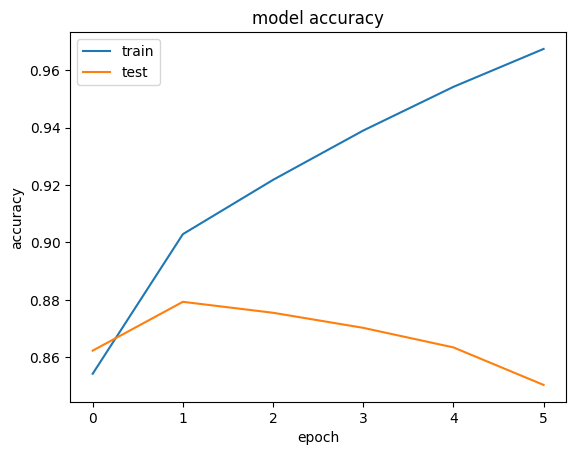

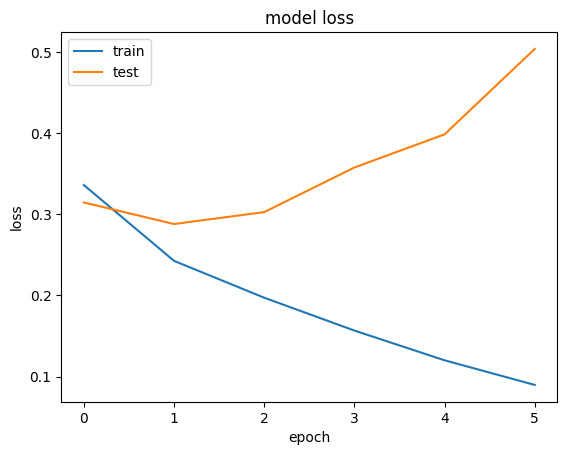

In [ ]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()